In [1]:
import mediapipe as mp
import cv2
from dollarpy import Recognizer, Template, Point
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [2]:
templates = []
sub_templates = []

In [17]:
def getPoints(videoURL, label):
    cap = cv2.VideoCapture(videoURL)
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=2) as holistic:
        points = []
        right_wrist = []
        right_index = []
        right_pinky = []

        m_right_index = []
        m_right_wrist = []
        m_right_pinky = []

        while cap.isOpened():
            ret, frame = cap.read()
            if ret != True:
                break
            if ret == True:
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image.flags.writeable = False
                # for detection
                results = holistic.process(image)

                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

                try:
                    pose = results.pose_landmarks.landmark
                    index = 0
                    newlist = []
                    for lnd in pose:
                        if (index in [16, 18, 20]):
                            newlist.append(lnd)
                        index += 1
                    right_wrist.append(Point(newlist[0].x, newlist[0].y, 2))
                    right_pinky.append(Point(newlist[1].x, newlist[1].y, 4))
                    right_index.append(Point(newlist[2].x, newlist[2].y, 3))

                    m_right_wrist.append((newlist[0].x, newlist[0].y))
                    m_right_pinky.append((newlist[1].x, newlist[1].y))
                    m_right_index.append((newlist[2].x, newlist[2].y))

                    # to get all values of x,y, and z in the newlist and flatten it(put it in 1 dimension)
                    # pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility]
                    #                           for landmark in newlist]).flatten())

                except:
                    pass

                if cv2.waitKey(1) == 27:
                    break

    cap.release()
    cv2.destroyAllWindows()
    points = right_wrist + right_index + right_pinky
    print(label)
    xs, ys = zip(*m_right_wrist)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_index)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_pinky)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')

    plt.gca().invert_yaxis()

    plt.show()
    return points

In [30]:
def getPointsLive():
    cap = cv2.VideoCapture(0)
    # address = "http://192.168.1.15:8080/video"
    # cap.open(address)
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.7) as holistic:
        points = []
        left_wrist = []
        right_wrist = []
        left_pinky = []
        right_pinky = []

        m_left_wrist = []
        m_right_wrist = []
        m_left_pinky = []
        m_right_pinky = []
        while cap.isOpened():
            ret, frame = cap.read()
            if ret != True:
                break
            if ret == True:
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image.flags.writeable = False
                # for detection
                results = holistic.process(image)

                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

                mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                          mp_drawing.DrawingSpec(
                                              color=(80, 22, 10), thickness=2, circle_radius=4),
                                          mp_drawing.DrawingSpec(
                                              color=(80, 44, 121), thickness=2, circle_radius=2)
                                          )

                # mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                #                           mp_drawing.DrawingSpec(
                #                               color=(121, 22, 76), thickness=2, circle_radius=4),
                #                           mp_drawing.DrawingSpec(
                #                               color=(121, 44, 250), thickness=2, circle_radius=2)
                #                           )

                try:
                    pose = results.pose_landmarks.landmark
                    index = 0
                    newlist = []
                    for lnd in pose:
                        if (index in [15, 16, 17, 18, 19, 20, 21, 22]):
                            newlist.append(lnd)
                        index += 1
                    left_wrist.append(Point(newlist[0].x, newlist[0].y, 1))
                    right_wrist.append(Point(newlist[1].x, newlist[1].y, 2))
                    left_pinky.append(Point(newlist[2].x, newlist[2].y, 3))
                    right_pinky.append(Point(newlist[3].x, newlist[3].y, 4))

                    m_left_wrist.append((newlist[0].x, newlist[0].y))
                    m_right_wrist.append((newlist[1].x, newlist[1].y))
                    m_left_pinky.append((newlist[2].x, newlist[2].y))
                    m_right_pinky.append((newlist[3].x, newlist[3].y))

                    # to get all values of x,y, and z in the newlist and flatten it(put it in 1 dimension)
                    pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility]
                                              for landmark in newlist]).flatten())

                    face = results.face_landmarks.landmark

                    row = pose_row

                except:
                    pass

            cv2.imshow("123", image)
            if cv2.waitKey(1) == 27:
                break

    xs, ys = zip(*m_right_wrist)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_pinky)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')

    xs, ys = zip(*m_left_wrist)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_left_pinky)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    cap.release()
    cv2.destroyAllWindows()
    points = right_wrist+right_pinky
    plt.gca().invert_yaxis()
    plt.show()
    return points

right


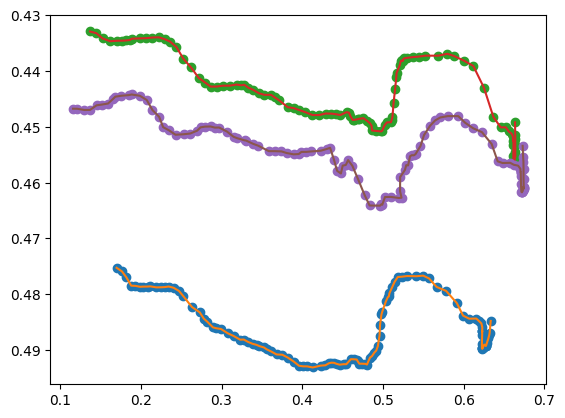

left


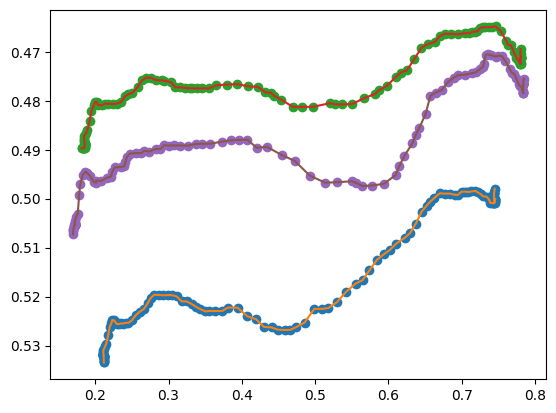

In [18]:
# training
vid = "C:\\Users\\ziads\\Documents\\MSA\\Sem 7\\CS484\\Project\Main\\vids\\slowright-right.mp4"
points = getPoints(vid, "right")
tmpl_2 = Template('right', points)
templates.append(tmpl_2)


vid = "C:\\Users\\ziads\\Documents\\MSA\\Sem 7\\CS484\\Project\\Main\\vids\\slowright-left.mp4"
points = getPoints(vid, "left")
tmpl_2 = Template('left', points)
templates.append(tmpl_2)

In [ ]:
import socket
import threading


def send(conn, data):
    msg = bytes(data, 'utf-8')
    print(msg)
    conn.send(msg)

In [ ]:
mySocket = socket.socket()
mySocket.bind(('localhost', 3000))
mySocket.listen()
conn, addr = mySocket.accept()
send_thread = threading.Thread(target=send, args=(conn, ''))
send_thread.start()

In [ ]:
# testing
points = getPointsLive()
tmpl = Template('', points)
# templates.append(tmpl")
print(points)
recognizer = Recognizer(templates)
result = recognizer.recognize(points)
if result[0] != None:
    if result[0] == 'left':
        send(conn, '0')
    if result[0] == 'right':
        send(conn, '1')
print(result)

In [ ]:

var1 = "1"
# while True:
#   if var1 == 0:
#      send(conn, var1)
#     var1 = 99
# if var1 == 1:
#   send(conn,var1)
#  var1 = 99'''

In [ ]:
send(conn, var1)

In [ ]:
send_thread.join()
mySocket.close()